In [54]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

In [55]:
# Модель Алиева-Панфилова (1996) без пространственного члена
#du/dt = F(u, v) = ku(1 - u)(u - a) - uv,
#dv/dt = H(u, v) = ε(u)(ku - v),

k = 8 # 8
a = 0.15 # 0.15
eps_0 = 0.002
mu_1 = 0.2
mu_2 = 0.3

In [56]:
def eps(u,v):
    return eps_0 + mu_1 * v / (u + mu_2)

def stim(t): # стимуляция
    return 0.1 if int(t - 1) % (500 / 12.9) < 3 else 0

def pend(y, t):
    u, v = y
    dydt = [k * u * (1 - u) * (u - a) - u * v + stim(t), 
            eps(u, v) * (k * u - v)]
    return dydt

In [57]:
t = np.arange(0, 100, 20/1000.) # Равномерная вычислительная сетка по времени
y_0 = [0.0, 0.0] # Начальные условия дифференциального уравнения

In [58]:
sol = odeint(pend, y_0, t) # Вызов решателя

In [59]:
t_res = 12.9 * t # Коррекция времени
sol_res = np.array(sol, copy=True)
sol_res[:, 0] = 100 * sol[:, 0] - 80 

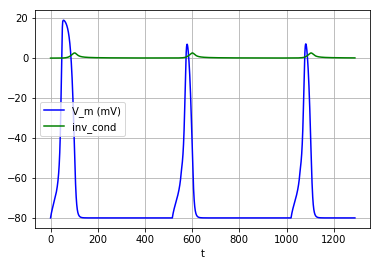

In [60]:
# Вывод всего решения
plt.plot(t_res, sol_res[:, 0], 'b', label='V_m (mV)')
plt.plot(t_res, sol_res[:, 1], 'g', label='inv_cond ')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()
# 1 пик - инерционный

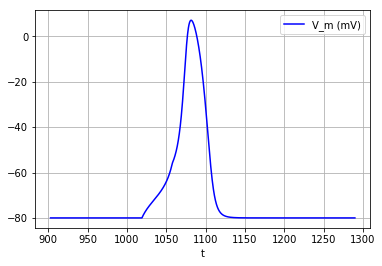

In [61]:
# Вывод последнего ПД (потенциал действия, action potential)
plt.plot(t_res[3500:], sol_res[3500:, 0], 'b', label='V_m (mV)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [66]:
def calculate_AP_heigth(time, V_m):
    return V_m.max() - V_m.min()

def calculate_APD(time, V_m, num):
    
    max_ = V_m.max()
    min_ = V_m.min()
    apd_threshold = (max_ - min_)*(1 - num) + min_
    idx_set = np.where(V_m > apd_threshold)[0]
    apd = time[idx_set[-1]] - time[idx_set[0]]
    
    return apd

In [67]:
print(calculate_AP_heigth(t_res[3500:], sol_res[3500:, 0]), "mV")

87.10439692956838 mV


In [68]:
print(calculate_APD(t_res[3500:], sol_res[3500:, 0], 0.2), "ms")
print(calculate_APD(t_res[3500:], sol_res[3500:, 0], 0.5), "ms")
print(calculate_APD(t_res[3500:], sol_res[3500:, 0], 0.9), "ms")

19.0920000000001 ms
32.25 ms
75.33600000000024 ms
